<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [3]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('data/job_listings.csv', index_col=0)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
def clean_descriptions(desc):

    # transform unicode to ascii
    desc = (desc.
            replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xc2\\xa8', '').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').#
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")")
           )
    # use BeautifulSoup to strip html tags
    soup = BeautifulSoup(desc)
    for st in soup(['script', 'style']):
        s.decompose()
    desc = ' '.join(soup.stripped_strings)
    
    # remove '\n' from string
    desc = (desc.
            replace('\\n', ' ').
            replace('\n',  ' ').
            replace('/', ' ').
            replace('$', '').
            replace(',', '')
           )
    
    #remove b' at begining of each string
    desc = desc[2:]
    
    # remove non aplh characters
    desc = re.sub(r'[^a-zA-Z ]', '', desc)
    
    desc = str.strip(desc)
    
    return desc

In [5]:
df['description'] = df['description'].apply(lambda x: clean_descriptions(x))

df.head()

,description,title
0,Job Requirements Conceptual understanding in ...,Data scientist
1,Job Description As a Data Scientist you w...,Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,a month Contract Under the general supervision...,Data Scientist
4,Location USA multiple locations years of A...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [7]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [8]:
def tokenize(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [11]:
df['tokens'] = df['description'].apply(lambda x: tokenize(x))
df['tokens'].head()

0    [job, Requirements,  , conceptual, understandi...
1    [job, description,     , Data, Scientist,  , h...
2    [Data, scientist, work, consult, business, res...
3    [month, Contract, general, supervision, Profes...
4    [location, USA,  , multiple, location,    , ye...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [12]:
vect = CountVectorizer(stop_words='english', min_df = 0.025, max_df= 0.95)
vect.fit(df.description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.025,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
sparse_dtm = vect.transform(df.description)
dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,aa,abilities,ability,able,academic,accelerate,accept,access,accessible,accommodation,...,wrangling,write,writing,written,year,years,york,youll,youre,youve
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 4) Visualize the most common word counts

C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


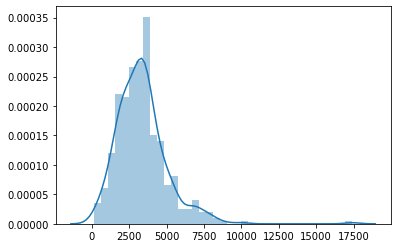

In [15]:
import seaborn as sns
doc_len = [len(doc) for doc in df.description]
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [16]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(df.description)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,aa,aap,aas,ab,abernathy,abilities,ability,able,abounds,abroad,...,zfs,zheng,zillow,zillows,zogsports,zones,zoom,zuckerberg,zurich,zurichs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.094714,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.021094,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.066684,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.108354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [18]:
from sklearn.neighbors import NearestNeighbors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [19]:
nn.kneighbors([dtm.iloc[0]])


(array([[0.        , 1.27864076, 1.30325861, 1.31898965, 1.32459524]]),
 array([[  0, 276, 274, 366, 338]], dtype=int64))

In [20]:
nn.kneighbors([dtm.iloc[1]])


(array([[0.        , 1.26855985, 1.27049007, 1.29461373, 1.29473101]]),
 array([[  1, 201, 222, 285, 327]], dtype=int64))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 